In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
gesture = 1
fulldata = pd.DataFrame(columns = ['aX','aY','aZ','gX','gY','gZ'])
for i in range(1,76):
    filepath = 'Training data/test_{0}_{1}.csv'.format(gesture, i)
    data = pd.read_csv(filepath, index_col=False)
    fulldata = fulldata.append(data)


In [128]:
import pywt
def wavelet(data, level):
    (cA, cD) = pywt.dwt(data, wavelet='rbio2.2')
    for i in range(1, level):
        (cA, cD) = pywt.dwt(cA, wavelet='rbio2.2')
    return cA

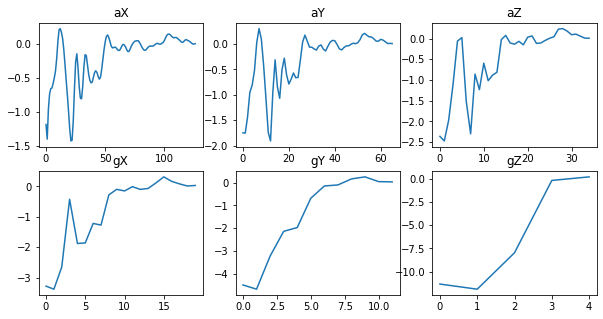

In [129]:

fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(1,2):
    axs[0,0].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,5],1))
    axs[0,0].set_title('aX')
    axs[0,1].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,5],2))
    axs[0,1].set_title('aY')
    axs[0,2].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,5],3))
    axs[0,2].set_title('aZ')
    axs[1,0].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,5],4))
    axs[1,0].set_title('gX')
    axs[1,1].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,5],5))
    axs[1,1].set_title('gY')
    axs[1,2].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,5],8))
    axs[1,2].set_title('gZ')
#plt.savefig('waveletDet_{0}.jpg'.format(gesture))

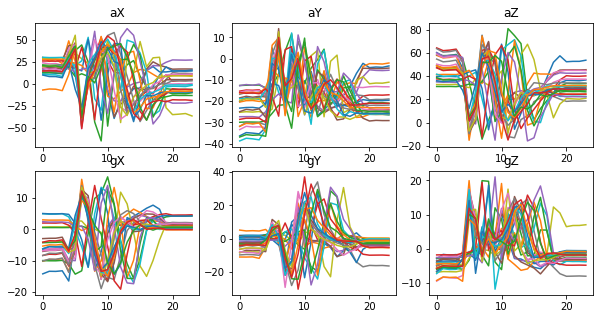

In [271]:
import pywt
fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(1,25):
    axs[0,0].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,0],4))
    axs[0,0].set_title('aX')
    axs[0,1].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,1],4))
    axs[0,1].set_title('aY')
    axs[0,2].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,2],4))
    axs[0,2].set_title('aZ')
    axs[1,0].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,3],4))
    axs[1,0].set_title('gX')
    axs[1,1].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,4],4))
    axs[1,1].set_title('gY')
    axs[1,2].plot(wavelet(fulldata.iloc[i*250:(i+1)*250,5],4))
    axs[1,2].set_title('gZ')
#plt.savefig('waveletDet_{0}.jpg'.format(gesture))

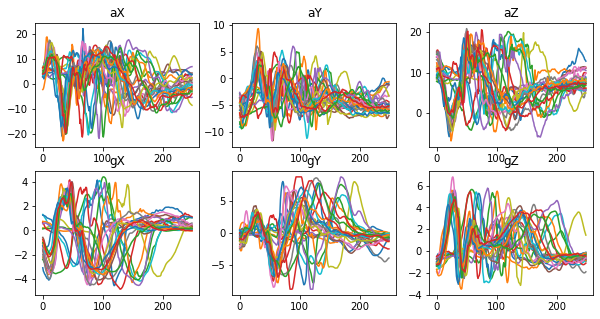

In [231]:
fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(1,25):
    axs[0,0].plot(fulldata.iloc[i*250:(i+1)*250,0])
    axs[0,0].set_title('aX')
    axs[0,1].plot(fulldata.iloc[i*250:(i+1)*250,1])
    axs[0,1].set_title('aY')
    axs[0,2].plot(fulldata.iloc[i*250:(i+1)*250,2])
    axs[0,2].set_title('aZ')
    axs[1,0].plot(fulldata.iloc[i*250:(i+1)*250,3])
    axs[1,0].set_title('gX')
    axs[1,1].plot(fulldata.iloc[i*250:(i+1)*250,4])
    axs[1,1].set_title('gY')
    axs[1,2].plot(fulldata.iloc[i*250:(i+1)*250,5])
    axs[1,2].set_title('gZ')


In [2]:
gestures = [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9
]

for gesture in gestures:
    fulldata = pd.DataFrame(columns = ['aX','aY','aZ','gX','gY','gZ'])
    fig, axs = plt.subplots(2,3, figsize = [10,5])
    for i in range(1,76):
        filepath = 'test_{0}_{1}.csv'.format(gesture, i)
        data = pd.read_csv(filepath, index_col=False)
        fulldata = fulldata.append(data)

        
        axs[0,0].plot(fulldata.iloc[(i-1)*250:i*250,0])
        axs[0,0].set_title('aX')
        axs[0,1].plot(fulldata.iloc[(i-1)*250:i*250,1])
        axs[0,1].set_title('aY')
        axs[0,2].plot(fulldata.iloc[(i-1)*250:i*250,2])
        axs[0,2].set_title('aZ')
        axs[1,0].plot(fulldata.iloc[(i-1)*250:i*250,3])
        axs[1,0].set_title('gX')
        axs[1,1].plot(fulldata.iloc[(i-1)*250:i*250,4])
        axs[1,1].set_title('gY')
        axs[1,2].plot(fulldata.iloc[(i-1)*250:i*250,5])
        axs[1,2].set_title('gZ')
        
    plt.savefig('test_{0}.jpg'.format(gesture))
    plt.close()